# DBSCAN Clustering Intution

In [24]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np
X = np.array([[1, 2], [3,4], [4,3], [8, 7], [7, 8], [25, 80]])

In [25]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 4,  3],
       [ 8,  7],
       [ 7,  8],
       [25, 80]])

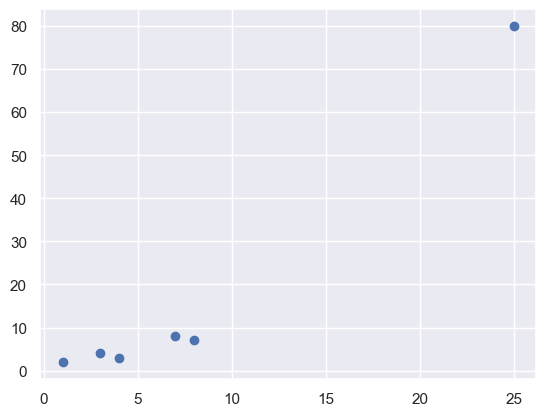

In [26]:
plt.scatter(X[:,0], X[:,1])

In [30]:
#clustering = DBSCAN(eps=3, min_samples=2).fit_predict(X)
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [31]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [32]:
clustering = DBSCAN(eps=9, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  0,  0, -1], dtype=int64)

In [33]:
clustering = DBSCAN(eps=9, min_samples=6).fit(X)
clustering.labels_

array([-1, -1, -1, -1, -1, -1], dtype=int64)

In [ ]:
#there is not a predict function over here clustering.predict
#we cannot predict on new point because dbscan takes data as density in one take and predict

# An important difference from K-means

In [7]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

C:\Users\Shruti.7\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Shruti.7\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1])

In [9]:
kmeans.cluster_centers_

array([[ 4.6,  4.8],
       [25. , 80. ]])

In [10]:
kmeans.predict([[24,81], [23,85]])

array([1, 1])

# Deciding Optimal value for epsilon

In [48]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

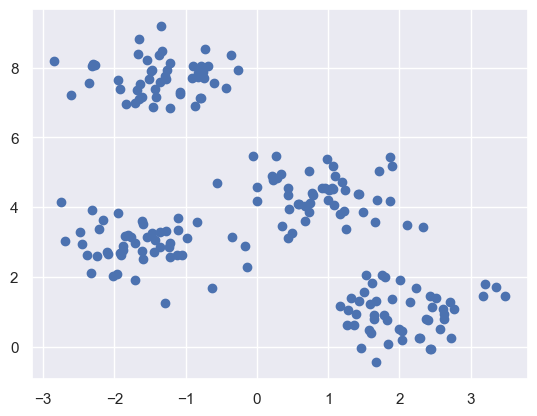

In [49]:
X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [37]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [38]:
NearestNeighbors(n_neighbors=1)
print(neigh.kneighbors([[0.1,0,0.1]]))

(array([[0.14142136]]), array([[0]], dtype=int64))


In [39]:
print(neigh.kneighbors([[0,0.4,0.1]]))

(array([[0.14142136]]), array([[1]], dtype=int64))


In [40]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [41]:
distances

array([[0.        , 0.3077693 ],
       [0.        , 0.07204812],
       [0.        , 0.15106217],
       [0.        , 0.40987856],
       [0.        , 0.08935554],
       [0.        , 0.21448673],
       [0.        , 0.17200706],
       [0.        , 0.15913959],
       [0.        , 0.24207383],
       [0.        , 0.01966341],
       [0.        , 0.02296282],
       [0.        , 0.01264242],
       [0.        , 0.03905497],
       [0.        , 0.24895377],
       [0.        , 0.1680786 ],
       [0.        , 0.25730896],
       [0.        , 0.03932308],
       [0.        , 0.16328387],
       [0.        , 0.19868524],
       [0.        , 0.21822875],
       [0.        , 0.17967984],
       [0.        , 0.3078788 ],
       [0.        , 0.22596451],
       [0.        , 0.12404174],
       [0.        , 0.13976049],
       [0.        , 0.13156219],
       [0.        , 0.22717367],
       [0.        , 0.1095539 ],
       [0.        , 0.1576804 ],
       [0.        , 0.17539258],
       [0.

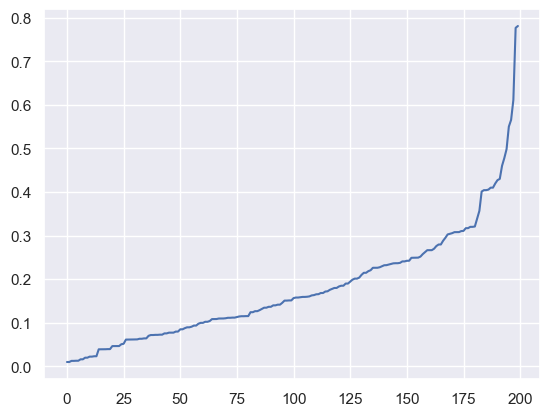

In [17]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [42]:
indices

array([[  0,  62],
       [  1,  88],
       [  2, 197],
       [  3,  60],
       [  4, 140],
       [  5,  94],
       [  6,  84],
       [  7, 119],
       [  8,  35],
       [  9,  37],
       [ 10,  65],
       [ 11, 123],
       [ 12, 112],
       [ 13,  77],
       [ 14, 168],
       [ 15,  35],
       [ 16,  80],
       [ 17,  41],
       [ 18,  48],
       [ 19, 199],
       [ 20, 156],
       [ 21, 163],
       [ 22, 181],
       [ 23,  69],
       [ 24, 107],
       [ 25, 190],
       [ 26,  42],
       [ 27, 190],
       [ 28, 128],
       [ 29, 115],
       [ 30,  75],
       [ 31, 192],
       [ 32,  76],
       [ 33,  62],
       [ 34,  36],
       [ 35,   8],
       [ 36, 196],
       [ 37,   9],
       [ 38, 122],
       [ 39,  64],
       [ 40,  30],
       [ 41, 175],
       [ 42, 100],
       [ 43, 184],
       [ 44,  71],
       [ 45, 117],
       [ 46, 152],
       [ 47,  67],
       [ 48,  97],
       [ 49, 115],
       [ 50,  17],
       [ 51,  88],
       [ 52,

In [50]:
dbscancluster = DBSCAN(eps=0.4, min_samples=5)
dbscancluster.fit(X)

DBSCAN(eps=0.4)

In [51]:
clusters = dbscancluster.labels_

In [52]:
len(set(clusters))

5

In [53]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clusters)

0.4225129353384709

In [69]:
dbscancluster = DBSCAN(eps=0.5, min_samples=3)
dbscancluster.fit(X)

DBSCAN(min_samples=3)

In [70]:
clusters = dbscancluster.labels_

In [71]:
len(set(clusters))

8

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silhouette_score(X,clusters)

0.36803593409209556

In [ ]:
# Find out a way to gety optimal "min_sample" 